In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
                                                                    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [2]:
from time import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [4]:
y_data = data['0']
del data['0']
x_data = data
del data


In [6]:
x_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


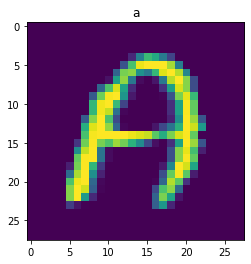

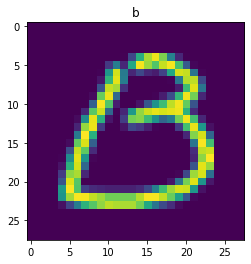

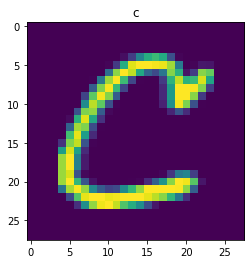

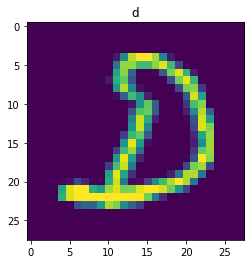

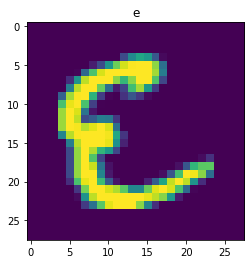

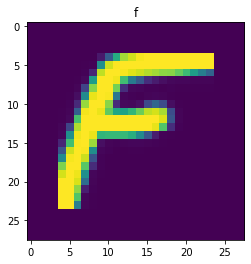

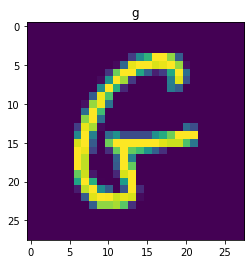

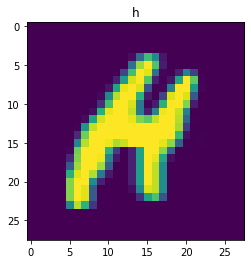

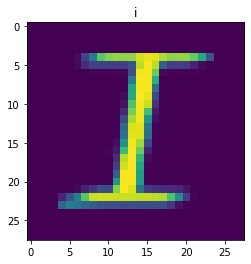

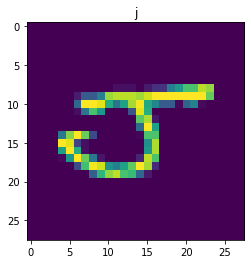

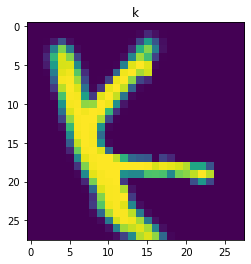

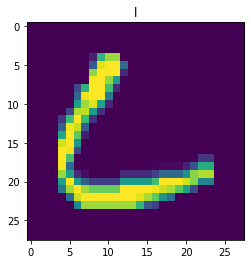

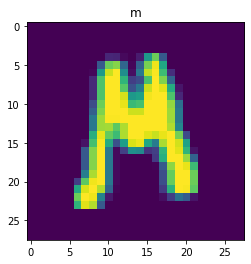

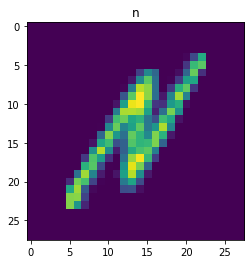

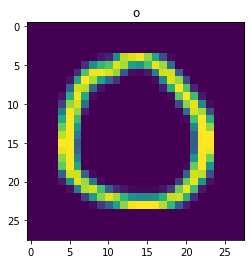

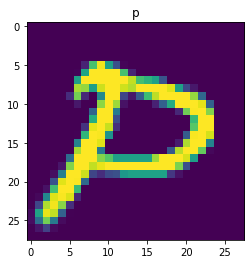

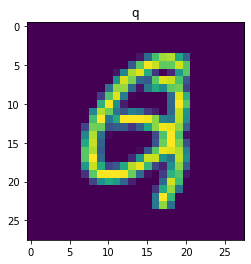

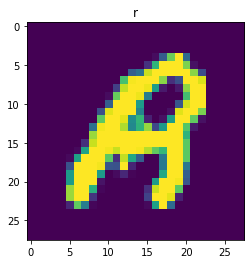

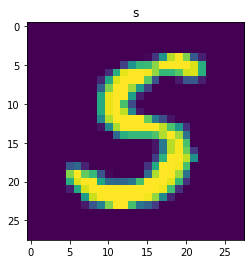

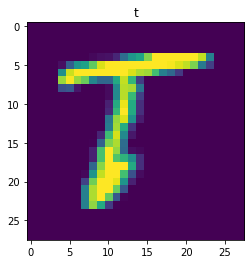

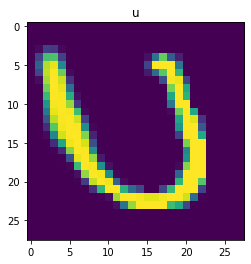

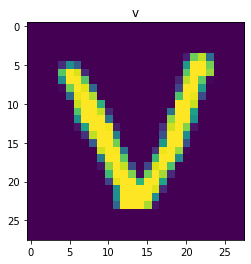

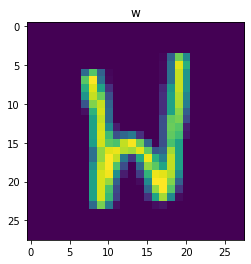

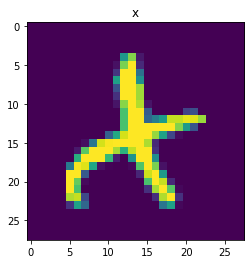

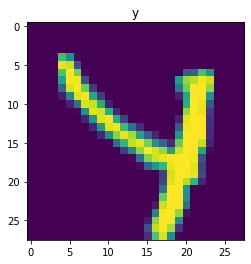

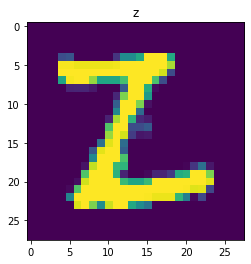

In [7]:
alphabets='abcdefghijklmnopqrstuvwxyz'
for i in range(26):
    plt.imshow(x_data[y_data==i].iloc[1][:].values.reshape((28,28)))
    plt.title(alphabets[i])
    plt.show()

In [5]:
labels=set(y_data)

In [9]:
print('The number of the data is',y_data.shape[0])
print('The number of classes in the dataset is',len(labels))

The number of the data is 372450
The number of classes in the dataset is 26


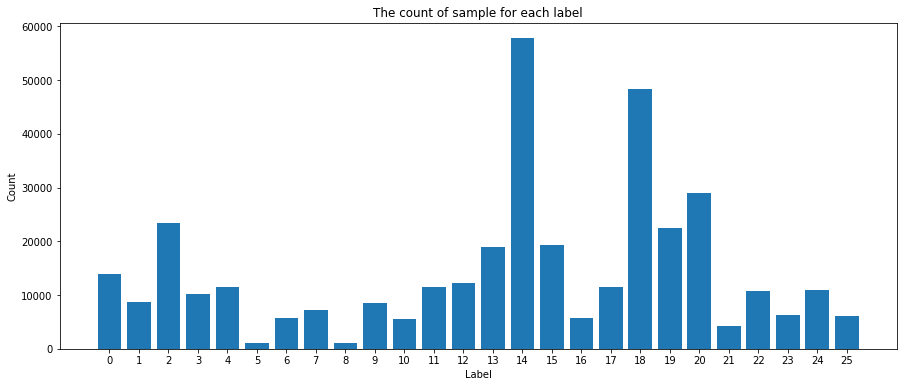

In [10]:
plt.figure(figsize=(15,6))
values_counts=y_data.value_counts()
values_counts=values_counts[values_counts.argsort()]
plt.bar(values_counts.index,values_counts.values)
plt.xticks([i for i in range(26)],[str(i) for i in range(26)])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('The count of sample for each label')
plt.show()


In [6]:
y_data=tf.keras.utils.to_categorical(y_data,len(labels))
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


In [7]:
del x_data
del y_data

## Part 2

In [9]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [14]:
model=get_model()

2022-06-18 16:50:24.894113: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])


# Part 3

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)

2022-06-18 16:50:32.727601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.7755 - accuracy: 0.7855 - val_loss: 0.3517 - val_accuracy: 0.9025
Epoch 2/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.3776 - accuracy: 0.8946 - val_loss: 0.2397 - val_accuracy: 0.9329
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2895 - accuracy: 0.9192 - val_loss: 0.1888 - val_accuracy: 0.9471
Epoch 4/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2445 - accuracy: 0.9310 - val_loss: 0.1603 - val_accuracy: 0.9553
Epoch 5/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2153 - accuracy: 0.9391 - val_loss: 0.1423 - val_accuracy: 0.9604
Epoch 6/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1948 - accuracy: 0.9449 - val_loss: 0.1290 - val_accuracy: 0.9644
Epoch 7/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1806 - accuracy: 0.9491 - val_loss: 0.1196 - val_ac

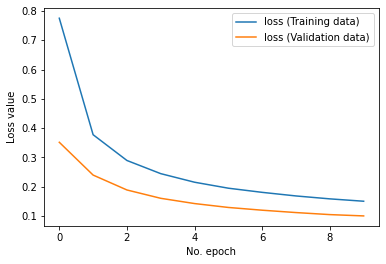

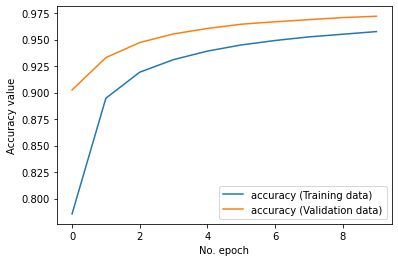

In [20]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

In [21]:
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))


              precision    recall  f1-score   support

           0      0.952     0.986     0.969     11104
           1      0.976     0.953     0.964      6916
           2      0.976     0.983     0.979     18698
           3      0.955     0.922     0.938      8143
           4      0.968     0.965     0.966      9252
           5      0.955     0.935     0.945       945
           6      0.954     0.936     0.945      4566
           7      0.966     0.925     0.945      5762
           8      0.983     0.897     0.938       897
           9      0.946     0.952     0.949      6803
          10      0.956     0.942     0.949      4499
          11      0.976     0.977     0.977      9243
          12      0.972     0.974     0.973      9917
          13      0.962     0.979     0.970     15229
          14      0.979     0.993     0.986     46182
          15      0.985     0.982     0.983     15438
          16      0.966     0.936     0.951      4678
          17      0.972    

In [22]:
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.948     0.985     0.966      2765
           1      0.975     0.929     0.951      1752
           2      0.972     0.983     0.977      4711
           3      0.951     0.910     0.930      1991
           4      0.965     0.963     0.964      2188
           5      0.953     0.936     0.944       218
           6      0.956     0.930     0.943      1196
           7      0.957     0.919     0.938      1456
           8      0.990     0.897     0.941       223
           9      0.948     0.944     0.946      1690
          10      0.946     0.922     0.934      1104
          11      0.976     0.975     0.976      2343
          12      0.966     0.966     0.966      2419
          13      0.955     0.974     0.965      3781
          14      0.977     0.992     0.984     11643
          15      0.979     0.980     0.980      3903
          16      0.958     0.941     0.949      1134
          17      0.958    

## LeakyReLU

In [23]:
model=get_model(activation_function='LeakyReLU')

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.7509 - accuracy: 0.7928 - val_loss: 0.4085 - val_accuracy: 0.8871
Epoch 2/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.4223 - accuracy: 0.8836 - val_loss: 0.3003 - val_accuracy: 0.9179
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.3440 - accuracy: 0.9050 - val_loss: 0.2469 - val_accuracy: 0.9326
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.2996 - accuracy: 0.9172 - val_loss: 0.2147 - val_accuracy: 0.9412
Epoch 5/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.2713 - accuracy: 0.9246 - val_loss: 0.1906 - val_accuracy: 0.9483
Epoch 6/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2513 - accuracy: 0.9303 - val_loss: 0.1766 - val_accuracy: 0.9509
Epoch 7/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2351 - accuracy: 0.9340 - val_loss: 0.1632 - val_ac

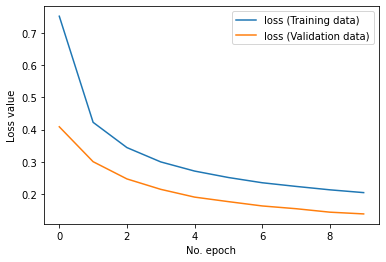

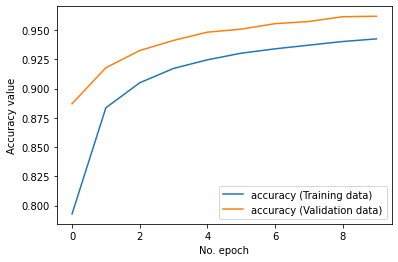

In [26]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [ ]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


For Train Data:


## Tanh

In [10]:
model=get_model(activation_function='tanh')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
__________________________________________________

2022-06-18 17:24:41.555976: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


2022-06-18 17:24:48.413876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
9312/9312 [==============================] - 39s 4ms/step - loss: 1.1604 - accuracy: 0.6628 - val_loss: 0.6837 - val_accuracy: 0.8003
Epoch 2/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.8192 - accuracy: 0.7577 - val_loss: 0.5698 - val_accuracy: 0.8352
Epoch 3/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.7129 - accuracy: 0.7900 - val_loss: 0.5165 - val_accuracy: 0.8496
Epoch 4/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.6423 - accuracy: 0.8111 - val_loss: 0.4588 - val_accuracy: 0.8673
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.5802 - accuracy: 0.8290 - val_loss: 0.4163 - val_accuracy: 0.8799
Epoch 6/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.5501 - accuracy: 0.8378 - val_loss: 0.3836 - val_accuracy: 0.8870
Epoch 7/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.5155 - accuracy: 0.8483 - val_loss: 0.3674 - val_ac

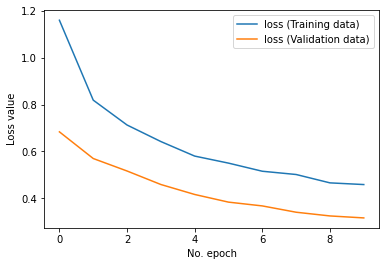

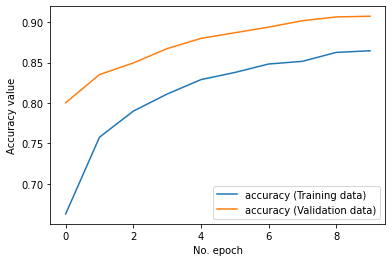

In [12]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()


In [13]:
print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


For Train Data:
              precision    recall  f1-score   support

           0      0.838     0.930     0.882     10978
           1      0.825     0.832     0.828      6937
           2      0.939     0.929     0.934     18780
           3      0.875     0.737     0.800      8145
           4      0.869     0.818     0.842      9230
           5      0.882     0.756     0.814       935
           6      0.885     0.764     0.820      4609
           7      0.814     0.741     0.776      5771
           8      0.906     0.768     0.831       883
           9      0.906     0.830     0.867      6696
          10      0.799     0.791     0.795      4498
          11      0.925     0.946     0.936      9186
          12      0.900     0.911     0.906      9923
          13      0.848     0.883     0.865     15144
          14      0.920     0.974     0.946     46298
          15      0.920     0.953     0.936     15464
          16      0.842     0.750     0.793      4679
          1

# Optimizer


## Momentum = 0.5

In [14]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
9312/9312 [==============================] - 38s 4ms/step - loss: 281170.4375 - accuracy: 0.1547 - val_loss: 3.6227 - val_accuracy: 0.1547
Epoch 2/10
9312/9312 [==============================] - 36s 4ms/step - loss: 3.1988 - accuracy: 0.1554 - val_loss: 2.9315 - val_accuracy: 0.1547
Epoch 3/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9284 - accuracy: 0.1554 - val_loss: 2.9313 - val_accuracy: 0.1547
Epoch 4/10
9312/9312 [==============================] - 39s 4ms/step - loss: 2.9283 - accuracy: 0.1554 - val_loss: 2.9313 - val_accuracy: 0.1547
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9311 - val_accuracy: 0.1547
Epoch 6/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9314 - val_accuracy: 0.1547
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 2.9282 - accuracy: 0.1554 - val_loss: 2.9314 - v

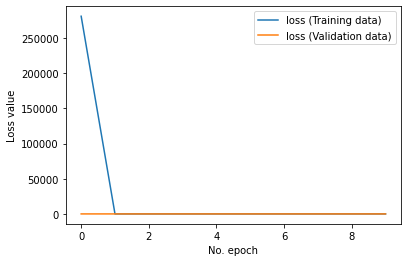

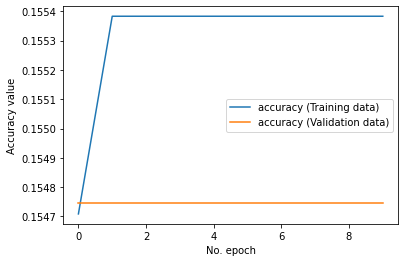

For Train Data:


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     10978
           1      0.000     0.000     0.000      6937
           2      0.000     0.000     0.000     18780
           3      0.000     0.000     0.000      8145
           4      0.000     0.000     0.000      9230
           5      0.000     0.000     0.000       935
           6      0.000     0.000     0.000      4609
           7      0.000     0.000     0.000      5771
           8      0.000     0.000     0.000       883
           9      0.000     0.000     0.000      6696
          10      0.000     0.000     0.000      4498
          11      0.000     0.000     0.000      9186
          12      0.000     0.000     0.000      9923
          13      0.000     0.000     0.000     15144
          14      0.155     1.000     0.269     46298
          15      0.000     0.000     0.000     15464
          16      0.000     0.000     0.000      4679
          17      0.000    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.9

In [20]:
model=get_model(activation_function='relu')
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 26)                3354      
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
________________________________________________

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


Epoch 1/10
3544/9312 [==========>...................] - ETA: 20s - loss: 288046.8125 - accuracy: 0.1543

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Momentum = 0.98

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.98), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Adam

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Number of Epochs

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Loss Function

In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


# Regularization

## L2 Regularization

In [ ]:
def get_model(activation_function='relu'):
    regularizer_parameter=0.0001
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(128, activation=activation_function,kernel_regularizer=tf.keras.regularizers.l2(regularizer_parameter)))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))


## Dropout

In [ ]:
def get_model(activation_function='relu'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (28*28, 1)))
    model.add(tf.keras.layers.Dense(256, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(128, activation=activation_function))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(len(labels), activation='softmax'))
    return model


In [ ]:
model=get_model(activation_function='relu')
model.summary()


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
tic=time()
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
toc=time()

print('The total time to train the model was:',toc-tic)


In [ ]:
plt.plot(history.history['loss'], label='loss (Training data)')
plt.plot(history.history['val_loss'], label='loss (Validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

plt.plot(history.history['accuracy'], label='accuracy (Training data)')
plt.plot(history.history['val_accuracy'], label='accuracy (Validation data)')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="best")
plt.show()

print('For Train Data:')
y_pred_train=np.argmax(model.predict(x_train),axis=1)
print(metrics.classification_report(np.argmax(y_train,axis=1), y_pred_train, digits=3))

print('For Test Data:')
y_pred_test=np.argmax(model.predict(x_test),axis=1)
print(metrics.classification_report(np.argmax(y_test,axis=1), y_pred_test, digits=3))
